<a href="https://colab.research.google.com/github/Broklink/Data-test/blob/main/One_for_all.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# โหลดข้อมูล
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/Colab Notebooks/vct pacific stage 1.csv"
df = pd.read_csv(path)

# ดูข้อมูลเบื้องต้น
print("ข้อมูล 5 แถวแรก:")
print(df.head())
print("\nข้อมูลรวม:")
print(df.info())
print("\nMissing values:")
print(df.isnull().sum())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
ข้อมูล 5 แถวแรก:
        Player  Round  Rating    ACS  Kills:Death   KAST%    ADR   KPR   APR  \
0     invy  TS    271    1.26  237.2         1.27  73.00%  158.4  0.87  0.35   
1  Jemkin  RRQ    573    1.22  253.9         1.30  73.00%  161.3  0.91  0.15   
2    dos9  BME    344    1.19  212.2         1.18  75.00%  136.3  0.76  0.47   
3  Jinggg  PRX    536    1.14  220.9         1.18  76.00%  145.4  0.79  0.32   
4   Foxy9  GEN    360    1.12  207.8         1.25  78.00%  137.3  0.77  0.18   

   FKPR  ...  HS% KMax    K    D    A   FK  FD  Clutch_Won  Clutch_Attempted  \
0  0.08  ...  29%   27  236  186   95   23  18           3                31   
1  0.24  ...  38%   32  524  404   87  137  84           9                50   
2  0.09  ...  26%   35  261  222  160   30  24          14                48   
3  0.10  ...  26%   31  422  359  171   53  43       

In [10]:
# ลบ Missing Values เฉพาะคอลัมน์สำคัญ
key_cols = ['Player', 'K', 'D', 'A', 'Clutch_Won']
df = df.dropna(subset=key_cols)

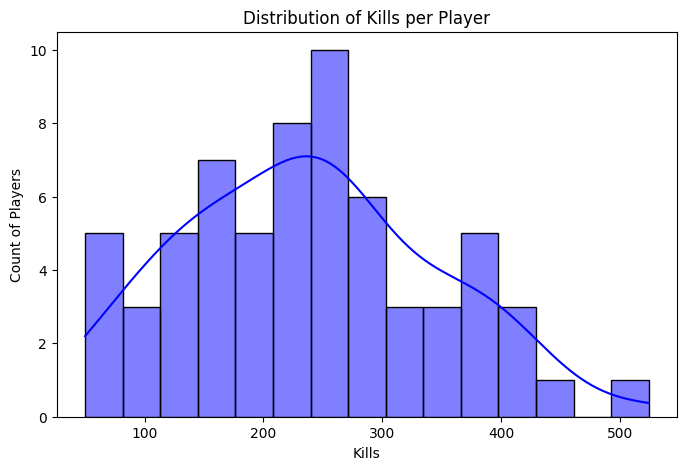

In [61]:
# ------------------------------
# 1. Distribution (การกระจายของ Kills)
# ------------------------------
plt.figure(figsize=(8,5))
sns.histplot(df['K'], bins=15, kde=True, color='blue')
plt.title('Distribution of Kills per Player')
plt.xlabel('Kills')
plt.ylabel('Count of Players')
plt.show()


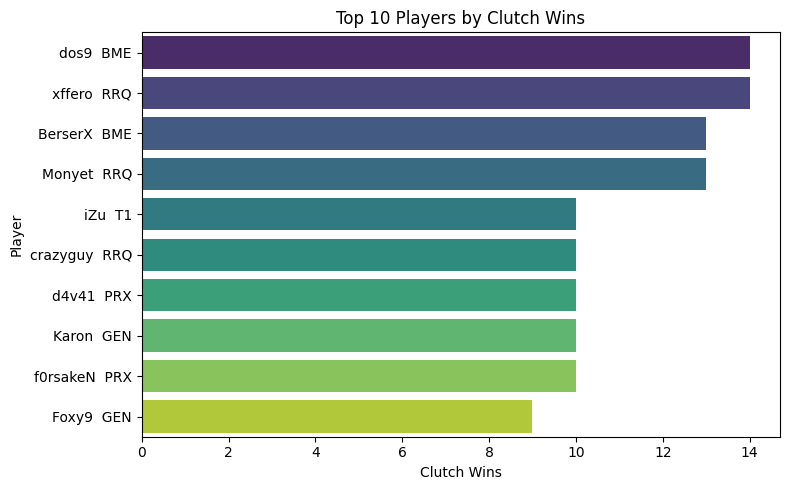

In [59]:
# ------------------------------
# 2. Comparison (Top 10 Clutch Wins)
# ------------------------------
clutch_top10 = df.groupby('Player')['Clutch_Won'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 5))
sns.barplot(x=clutch_top10.values, y=clutch_top10.index, palette='viridis', hue=clutch_top10.index, legend=False)

plt.title('Top 10 Players by Clutch Wins')
plt.xlabel('Clutch Wins')
plt.ylabel('Player')

plt.tight_layout()
plt.show()

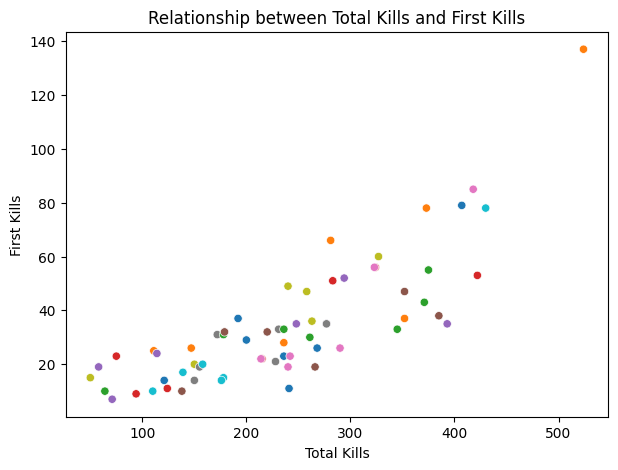

In [56]:
# ------------------------------
# 3. Relationship (Kills vs First Kills)
# ------------------------------

plt.figure(figsize=(7,5))

sns.scatterplot(data=df, x='K', y='FK', hue='Player', legend=False, palette='tab10')

plt.title('Relationship between Total Kills and First Kills')
plt.xlabel('Total Kills')
plt.ylabel('First Kills')

plt.show()

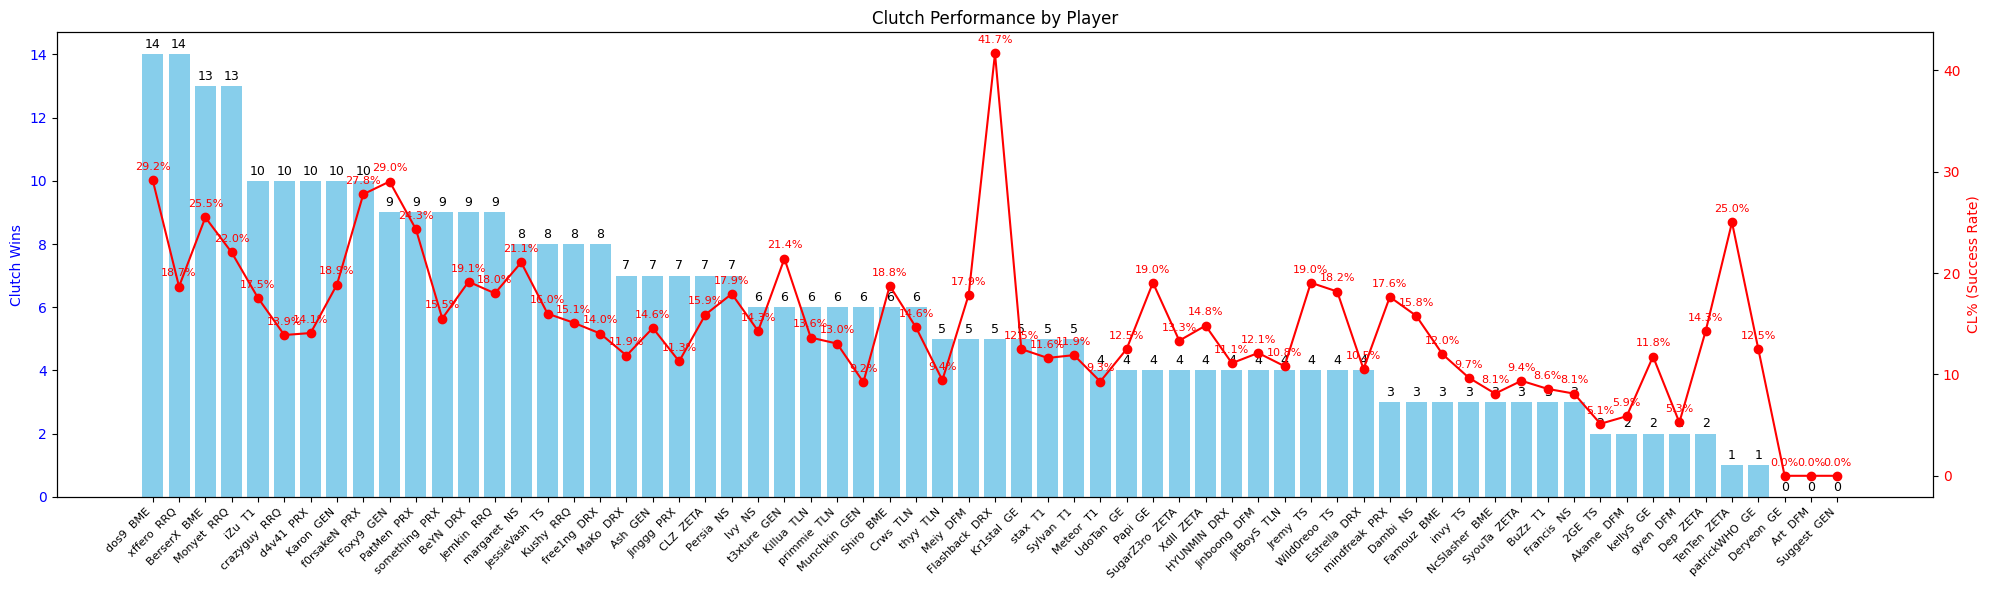

In [60]:
# ------------------------------
# 4. Composition (Clutch_Won and Clutch_Attempted)
# ------------------------------

clutch_data = df.groupby('Player')[['Clutch_Won', 'Clutch_Attempted']].sum()
clutch_data['CL%'] = clutch_data['Clutch_Won'] / clutch_data['Clutch_Attempted'] * 100
clutch_data = clutch_data.sort_values('Clutch_Won', ascending=False)

fig, ax1 = plt.subplots(figsize=(20, 6))

# แท่งแสดง Clutch_Won
bars = ax1.bar(clutch_data.index, clutch_data['Clutch_Won'], color='skyblue')
ax1.set_ylabel('Clutch Wins', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# ใส่ตัวเลขบนแท่ง
for bar in bars:
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height()+0.2, int(bar.get_height()),
             ha='center', fontsize=9)

# เส้นแสดง CL%
ax2 = ax1.twinx()
ax2.plot(clutch_data.index, clutch_data['CL%'], 'ro-', label='CL%')
ax2.set_ylabel('CL% (Success Rate)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# ใส่เปอร์เซ็นต์บนจุด
for i, val in enumerate(clutch_data['CL%']):
    ax2.text(i, val + 1, f"{val:.1f}%", color='red', ha='center', fontsize=8)

# จัดการป้ายชื่อให้เอียง และขนาดลดลง
ax1.set_xticks(range(len(clutch_data.index)))
ax1.set_xticklabels(clutch_data.index, rotation=45, ha='right', fontsize=8)

plt.title('Clutch Performance by Player')
fig.tight_layout()
plt.show()